# Plot bike usage on map

In [1]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (8,6)

import contextlib
import urllib
from lxml import etree
import datetime
import pandas as pd
import time
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

## Import existing bikedata file from csv

In [2]:
bikedata = pd.DataFrame.from_csv('bikelog_100215.csv')
bikedata.head()

,Colleges of the Fenway,Tremont St. at Berkeley St.,Northeastern U / North Parking Lot,Cambridge St. at Joy St.,Fan Pier,Union Square - Brighton Ave. at Cambridge St.,Agganis Arena - 925 Comm Ave.,B.U. Central - 725 Comm. Ave.,Longwood Ave / Binney St,Ruggles Station / Columbus Ave.,...,Dana Park,Danehy Park,Kendall Street,Alewife Station at Russell Field,EF - North Point Park,Rindge Avenue - O'Neill Library,Harvard University Transportation Services - 175 North Harvard St,State Street at Channel Center,John F Fitzgerald - Surface Road at India Street,Ink Block
2015-10-02 10:46:40.589,2,5,3,1,7,10,16,10,8,10,...,3,7,13,16,7,10,11,3,12,4
2015-10-02 10:47:40.689,2,5,3,1,8,10,16,10,8,10,...,3,8,13,16,7,10,11,3,12,4
2015-10-02 10:48:40.789,2,5,3,1,8,10,16,10,8,10,...,3,8,13,16,7,10,11,3,12,4
2015-10-02 10:49:40.891,2,5,3,1,8,10,16,11,8,10,...,3,8,13,16,7,10,11,3,12,4
2015-10-02 10:50:41.005,2,5,3,0,8,10,16,11,8,10,...,2,8,13,16,7,10,11,3,12,4


In [3]:
# grab XML file for lat/long and capacity
def getupdate():
    u = 'http://www.thehubway.com/data/stations/bikeStations.xml'
    # tweak of urlopen from hubway_repeatingquery, see http://stackoverflow.com/a/1522709
    with contextlib.closing(urllib.urlopen(u)) as x:
        data = etree.parse(x)
    stations = data.findall('station')
    everything = [[elt.text for elt in station.getchildren()] for station in stations]
    df = pd.DataFrame(everything, columns = [elt.tag for elt in data.find('station')]).convert_objects(convert_numeric=True)
    df.set_index('name', inplace=True)
    return df
df = getupdate()
df['capacity'] = df['nbBikes'] + df['nbEmptyDocks']

In [4]:
df.head()

,id,terminalName,lastCommWithServer,lat,long,installed,locked,installDate,removalDate,temporary,public,nbBikes,nbEmptyDocks,latestUpdateTime,capacity
name,,,,,,,,,,,,,,,
Colleges of the Fenway,3,B32006,1444065408688,42.340021,-71.100812,true,false,0,None,false,true,14,0,1444062326443,14
Tremont St. at Berkeley St.,4,C32000,1444065388574,42.345392,-71.069616,true,false,0,None,false,true,7,8,1444065127947,15
Northeastern U / North Parking Lot,5,B32012,1444065317968,42.341814,-71.090179,true,false,0,None,false,true,9,6,1444063999779,15
Cambridge St. at Joy St.,6,D32000,1444065330409,42.361174,-71.065142,true,false,0,None,false,true,0,15,1444063679421,15
Fan Pier,7,A32000,1444065330512,42.353287,-71.044389,true,false,0,None,false,true,13,0,1444063322188,13


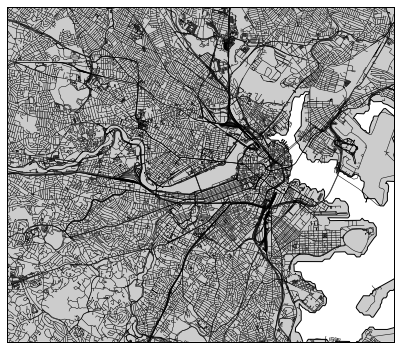

In [15]:
hub_map = Basemap(projection='merc', lat_0 = 42.34, lon_0 = -71.10,
    resolution = 'f', area_thresh = 0.1,
    llcrnrlon=-71.18, llcrnrlat=42.30,
    urcrnrlon=-71.00, urcrnrlat=42.415)
hub_map.readshapefile('../../../Documents/boston_massachusetts_osm_roads','roads')
hub_map.drawcoastlines()
hub_map.fillcontinents()
hub_map.drawmapboundary()
#x,y = hub_map(df.long.values, df.lat.values)
#bikechange = (bikedata.iloc[-1] - bikedata.iloc[0]).values
#hub_map.scatter(x, y, c=[bikechange], cmap = 'bwr',
#                  s = (df.capacity * 1.5).values)

In [29]:
df.terminalName

name
Colleges of the Fenway                                                   B32006
Tremont St. at Berkeley St.                                              C32000
Northeastern U / North Parking Lot                                       B32012
Cambridge St. at Joy St.                                                 D32000
Fan Pier                                                                 A32000
Union Square - Brighton Ave. at Cambridge St.                            A32001
Agganis Arena - 925 Comm Ave.                                            A32002
B.U. Central - 725 Comm. Ave.                                            A32003
Longwood Ave / Binney St                                                 A32004
Ruggles Station / Columbus Ave.                                          B32002
Boston Medical Center -  East Concord at Harrison Ave                    C32002
HMS / HSPH - Ave. Louis Pasteur at Longwood Ave.                         B32003
Harvard Real Estate - Brighton Mill

In [30]:
bikedata.columns

Index([u'Colleges of the Fenway', u'Tremont St. at Berkeley St.',
       u'Northeastern U / North Parking Lot', u'Cambridge St. at Joy St.',
       u'Fan Pier', u'Union Square - Brighton Ave. at Cambridge St.',
       u'Agganis Arena - 925 Comm Ave.', u'B.U. Central - 725 Comm. Ave.',
       u'Longwood Ave / Binney St', u'Ruggles Station / Columbus Ave.', 
       ...
       u'Dana Park', u'Danehy Park', u'Kendall Street',
       u'Alewife Station at Russell Field', u'EF - North Point Park',
       u'Rindge Avenue - O'Neill Library',
       u'Harvard University Transportation Services - 175 North Harvard St',
       u'State Street at Channel Center',
       u'John F Fitzgerald - Surface Road at India Street', u'Ink Block'],
      dtype='object', length=139)

In [25]:
x.size

142

In [27]:
bikedata.iloc[0].shape

(139,)

ValueError: Color array must be two-dimensional

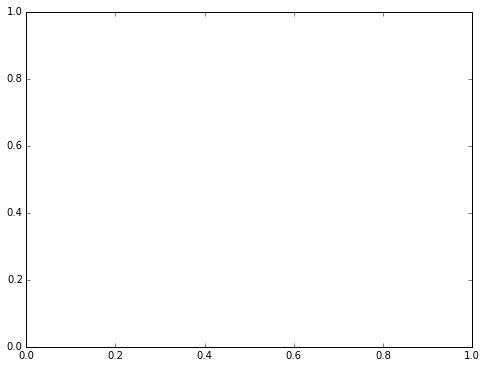

In [23]:
x,y = hub_map(df.long.values, df.lat.values)
bikechange = (bikedata.iloc[-1] - bikedata.iloc[0]).values
plot_handle = hub_map.scatter(x, y, c=bikechange, cmap = 'bwr',
                  s = (df.capacity * 2).values)

why is the scatterplot not appearing above??

In [ ]:
# try to be able to preserve underlying map, http://stackoverflow.com/a/11172072

plot_handle, = self.map.plot(x,y,'ro') 
# When changing the data, change the xdata and ydata and redraw
plot_handle.set_ydata(new_y)
plot_handle.set_xdata(new_x)
hub_map.figure.canvas.draw()